### О ЛР:

- Coding Gradient boosting

----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку (Она тут равняется 6).

**Оценка**:

***DeadLine - 09.01.2025 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.

In [2]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set_theme(style="darkgrid")
filterwarnings("ignore")

In [3]:
x = load_npz("x.npz")
y = np.load("y.npy")

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 666 для воспроизводимости).

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=666
)

x_test, x_valid, y_test, y_valid = train_test_split(
    x_test, y_test, test_size=0.5, random_state=666
)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга [2 балла]

Необходимо дописать код в файле `boosting.py`. Уже создан шаблон класса `Boosting`, который можно модифицировать по своему усмотрению.

### Описание функций:

#### `__init__`

Конструктор класса принимает следующие параметры:

- `base_model_class` — класс базовой модели для бустинга.
- `base_model_params` — словарь гиперпараметров для базовой модели.
- `n_estimators` — количество базовых моделей для обучения.
- `learning_rate` — темп обучения, должен быть в диапазоне (0, 1].
- `subsample` — доля обучающей выборки для тренировки базовой модели (размер бутстрап-выборки относительно исходной).
- `early_stopping_rounds` — число итераций без улучшения на валидационной выборке, после которых обучение прекращается.
- `plot` — флаг для построения графика качества моделей после обучения.

#### `fit`

Метод `fit` принимает обучающую и валидационную выборки.

1. Инициализируем нулевую модель и делаем предсказания (например, все нули) для обеих выборок.
2. Обучаем `n_estimators` базовых моделей:
   - Обучаем новую базовую модель на текущих остатках.
   - Обновляем предсказания на обучающей и валидационной выборках.
   - Рассчитываем ошибки на обеих выборках с помощью `loss_fn`.
   - Проверяем условия для ранней остановки.

3. Если флаг `plot` установлен, строим график качества после обучения всех моделей.

#### `fit_new_base_model`

Метод `fit_new_base_model` принимает обучающую выборку и текущие предсказания для неё.

1. Генерируем бутстрап-выборку.
2. Обучаем базовую модель на этой выборке.
3. Оптимизируем значение гаммы.
4. Добавляем новую базовую модель и гамму в соответствующие списки (учитывая `learning_rate`).

#### `predict_proba`

Метод `predict_proba` принимает выборку для предсказания вероятностей.

1. Суммируем предсказания базовых моделей (учитывая гамму и `learning_rate`).
2. Применяем сигмоидальную функцию для получения вероятностей.

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [7]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

Iteration 1: Train Loss = 0.6551; Validation Loss = 0.6590
Iteration 2: Train Loss = 0.6219; Validation Loss = 0.6298
Iteration 3: Train Loss = 0.5932; Validation Loss = 0.6051
Iteration 4: Train Loss = 0.5681; Validation Loss = 0.5840
Iteration 5: Train Loss = 0.5463; Validation Loss = 0.5648
Iteration 6: Train Loss = 0.5271; Validation Loss = 0.5490
Iteration 7: Train Loss = 0.5101; Validation Loss = 0.5354
Iteration 8: Train Loss = 0.4951; Validation Loss = 0.5221
Iteration 9: Train Loss = 0.4817; Validation Loss = 0.5111
Iteration 10: Train Loss = 0.4699; Validation Loss = 0.5019
CPU times: total: 1.44 s
Wall time: 1.43 s
Train ROC-AUC 0.9881
Valid ROC-AUC 0.9408
Test ROC-AUC 0.9434


## Задание 2. Обучение градиентного бустинга [0.5 балла]

Оцените качество вашей реализации градиентного бустинга на тестовой выборке, используя базовые модели — решающие деревья с различной максимальной глубиной. Метрикой будет ROC-AUC.

**Инструкция:**
1. Перебирайте значения максимальной глубины деревьев от 1 до 30 с шагом 2.
2. Оставьте остальные параметры бустинга по умолчанию.
3. Постройте график зависимости качества на обучающей и тестовой выборке от максимальной глубины деревьев.

Iteration 1: Train Loss = 0.6708; Validation Loss = 0.6714
Iteration 2: Train Loss = 0.6517; Validation Loss = 0.6528
Iteration 3: Train Loss = 0.6354; Validation Loss = 0.6373
Iteration 4: Train Loss = 0.6211; Validation Loss = 0.6234
Iteration 5: Train Loss = 0.6090; Validation Loss = 0.6115
Iteration 6: Train Loss = 0.5979; Validation Loss = 0.6007
Iteration 7: Train Loss = 0.5885; Validation Loss = 0.5915
Iteration 8: Train Loss = 0.5802; Validation Loss = 0.5837
Iteration 9: Train Loss = 0.5727; Validation Loss = 0.5762
Iteration 10: Train Loss = 0.5660; Validation Loss = 0.5697
Iteration 1: Train Loss = 0.6646; Validation Loss = 0.6652
Iteration 2: Train Loss = 0.6402; Validation Loss = 0.6415
Iteration 3: Train Loss = 0.6188; Validation Loss = 0.6203
Iteration 4: Train Loss = 0.6003; Validation Loss = 0.6022
Iteration 5: Train Loss = 0.5838; Validation Loss = 0.5864
Iteration 6: Train Loss = 0.5695; Validation Loss = 0.5722
Iteration 7: Train Loss = 0.5574; Validation Loss = 0.5

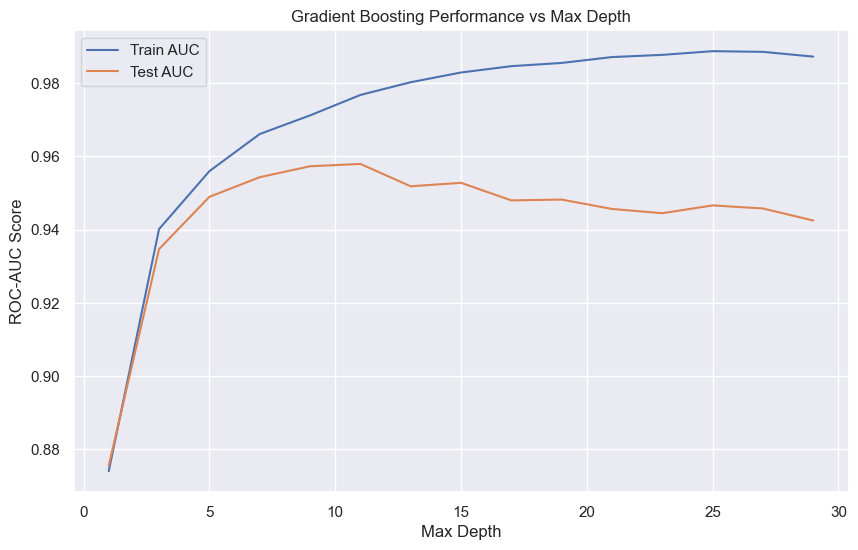

In [8]:
results = {}

depths = range(1, 30, 2)

### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

for depth in depths:
    boosting = Boosting(
        base_model_params={'max_depth': depth}, 
        n_estimators=10, 
        learning_rate=0.1, 
        subsample=0.3, early_stopping_rounds=None, 
        plot=False
        )

    boosting.fit(x_train, y_train, x_valid, y_valid)

    train_roc_auc = boosting.score(x_train, y_train)
    test_roc_auc = boosting.score(x_test, y_test)

    results[depth] = (train_roc_auc, test_roc_auc)

train_scores = [results[d][0] for d in depths]
test_scores = [results[d][1] for d in depths]

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Train AUC')
plt.plot(depths, test_scores, label='Test AUC')
plt.xlabel('Max Depth')
plt.ylabel('ROC-AUC Score')
plt.title('Gradient Boosting Performance vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Лучшее качество на тестовой выборке достигается при максимальной глубине дерева около 10, так как до этого она растёт.

Где-то после 11-13 тестовая выборка начинает падение, что показывает, что у нас начинается оверфиттинг и подстраивание под шум и специфические данные.

## Задание 3. Подбор гиперпараметров и поиск оптимальной модели [3 балла]

Настройте основные гиперпараметры вашей модели градиентного бустинга, используя валидационную выборку. Подберите параметры как для самого бустинга, так и для базовых моделей.

**Рекомендации:**
- Используйте библиотеки для автоматизированного подбора гиперпараметров, такие как [Hyperopt](https://github.com/hyperopt/hyperopt) или [Optuna](https://optuna.org/).
- Подберите все основные параметры, чтобы найти лучшую модель на валидационной выборке.

!pip install optuna

In [10]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

import optuna

def objective(trial):
    base_model_params = {
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
    }
    boosting_params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200, step=10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'early_stopping_rounds': 10,
    }

    model = Boosting(base_model_params=base_model_params, **boosting_params, plot=False)

    model.fit(x_train, y_train, x_valid, y_valid)

    valid_auc = model.score(x_valid, y_valid)

    return valid_auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

best_params = study.best_params
print(f"Лучшие параметры: {best_params}")

print("Параметры:")
for key, val in best_params.items():
    print(f"    {key}: {val}")

[I 2025-01-13 00:29:03,834] A new study created in memory with name: no-name-c7f75dbf-dc53-4a7d-bc1e-abf10ce4bb18


Iteration 1: Train Loss = 0.6381; Validation Loss = 0.6392
Iteration 2: Train Loss = 0.5972; Validation Loss = 0.5992
Iteration 3: Train Loss = 0.5660; Validation Loss = 0.5689
Iteration 4: Train Loss = 0.5414; Validation Loss = 0.5450
Iteration 5: Train Loss = 0.5220; Validation Loss = 0.5260
Iteration 6: Train Loss = 0.5064; Validation Loss = 0.5105
Iteration 7: Train Loss = 0.4945; Validation Loss = 0.4991
Iteration 8: Train Loss = 0.4845; Validation Loss = 0.4890
Iteration 9: Train Loss = 0.4763; Validation Loss = 0.4809
Iteration 10: Train Loss = 0.4690; Validation Loss = 0.4737
Iteration 11: Train Loss = 0.4630; Validation Loss = 0.4682
Iteration 12: Train Loss = 0.4582; Validation Loss = 0.4638
Iteration 13: Train Loss = 0.4536; Validation Loss = 0.4593
Iteration 14: Train Loss = 0.4499; Validation Loss = 0.4558
Iteration 15: Train Loss = 0.4467; Validation Loss = 0.4522
Iteration 16: Train Loss = 0.4441; Validation Loss = 0.4494
Iteration 17: Train Loss = 0.4420; Validation Los

[I 2025-01-13 00:29:09,059] Trial 0 finished with value: 0.9630955240611738 and parameters: {'max_depth': 4, 'min_samples_leaf': 7, 'n_estimators': 50, 'learning_rate': 0.18668681026667652, 'subsample': 0.9409123279722404}. Best is trial 0 with value: 0.9630955240611738.


Iteration 50: Train Loss = 0.4215; Validation Loss = 0.4298
Iteration 1: Train Loss = 0.6702; Validation Loss = 0.6710
Iteration 2: Train Loss = 0.6495; Validation Loss = 0.6510
Iteration 3: Train Loss = 0.6305; Validation Loss = 0.6326
Iteration 4: Train Loss = 0.6136; Validation Loss = 0.6160
Iteration 5: Train Loss = 0.5983; Validation Loss = 0.6011
Iteration 6: Train Loss = 0.5840; Validation Loss = 0.5874
Iteration 7: Train Loss = 0.5713; Validation Loss = 0.5751
Iteration 8: Train Loss = 0.5595; Validation Loss = 0.5637
Iteration 9: Train Loss = 0.5487; Validation Loss = 0.5532
Iteration 10: Train Loss = 0.5387; Validation Loss = 0.5434
Iteration 11: Train Loss = 0.5295; Validation Loss = 0.5348
Iteration 12: Train Loss = 0.5211; Validation Loss = 0.5268
Iteration 13: Train Loss = 0.5135; Validation Loss = 0.5198
Iteration 14: Train Loss = 0.5066; Validation Loss = 0.5132
Iteration 15: Train Loss = 0.5001; Validation Loss = 0.5071
Iteration 16: Train Loss = 0.4940; Validation Los

[I 2025-01-13 00:29:17,567] Trial 1 finished with value: 0.9648200892976295 and parameters: {'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 90, 'learning_rate': 0.06830870104262245, 'subsample': 0.6198369399840657}. Best is trial 1 with value: 0.9648200892976295.


Iteration 1: Train Loss = 0.5747; Validation Loss = 0.5776
Iteration 2: Train Loss = 0.5197; Validation Loss = 0.5224
Iteration 3: Train Loss = 0.4886; Validation Loss = 0.4913
Iteration 4: Train Loss = 0.4715; Validation Loss = 0.4754
Iteration 5: Train Loss = 0.4600; Validation Loss = 0.4628
Iteration 6: Train Loss = 0.4513; Validation Loss = 0.4542
Iteration 7: Train Loss = 0.4472; Validation Loss = 0.4503
Iteration 8: Train Loss = 0.4432; Validation Loss = 0.4466
Iteration 9: Train Loss = 0.4423; Validation Loss = 0.4451
Iteration 10: Train Loss = 0.4412; Validation Loss = 0.4443
Iteration 11: Train Loss = 0.4390; Validation Loss = 0.4423
Iteration 12: Train Loss = 0.4367; Validation Loss = 0.4401
Iteration 13: Train Loss = 0.4354; Validation Loss = 0.4389
Iteration 14: Train Loss = 0.4351; Validation Loss = 0.4385
Iteration 15: Train Loss = 0.4344; Validation Loss = 0.4380
Iteration 16: Train Loss = 0.4336; Validation Loss = 0.4375
Iteration 17: Train Loss = 0.4335; Validation Los

[I 2025-01-13 00:29:27,807] Trial 2 finished with value: 0.9410094216243626 and parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 110, 'learning_rate': 0.4622395159111369, 'subsample': 0.8032335757862877}. Best is trial 1 with value: 0.9648200892976295.


Iteration 109: Train Loss = 0.4186; Validation Loss = 0.4248
Iteration 110: Train Loss = 0.4186; Validation Loss = 0.4248
Iteration 1: Train Loss = 0.6927; Validation Loss = 0.6927
Iteration 2: Train Loss = 0.6923; Validation Loss = 0.6923
Iteration 3: Train Loss = 0.6918; Validation Loss = 0.6919
Iteration 4: Train Loss = 0.6914; Validation Loss = 0.6915
Iteration 5: Train Loss = 0.6910; Validation Loss = 0.6911
Iteration 6: Train Loss = 0.6905; Validation Loss = 0.6907
Iteration 7: Train Loss = 0.6901; Validation Loss = 0.6903
Iteration 8: Train Loss = 0.6897; Validation Loss = 0.6899
Iteration 9: Train Loss = 0.6892; Validation Loss = 0.6894
Iteration 10: Train Loss = 0.6888; Validation Loss = 0.6890
Iteration 11: Train Loss = 0.6884; Validation Loss = 0.6886
Iteration 12: Train Loss = 0.6879; Validation Loss = 0.6882
Iteration 13: Train Loss = 0.6875; Validation Loss = 0.6878
Iteration 14: Train Loss = 0.6871; Validation Loss = 0.6874
Iteration 15: Train Loss = 0.6867; Validation L

[I 2025-01-13 00:29:59,815] Trial 3 finished with value: 0.961714880523432 and parameters: {'max_depth': 12, 'min_samples_leaf': 8, 'n_estimators': 180, 'learning_rate': 0.0012021620178382655, 'subsample': 0.654231431564571}. Best is trial 1 with value: 0.9648200892976295.


Iteration 180: Train Loss = 0.6252; Validation Loss = 0.6287
Iteration 1: Train Loss = 0.6917; Validation Loss = 0.6917
Iteration 2: Train Loss = 0.6903; Validation Loss = 0.6903
Iteration 3: Train Loss = 0.6888; Validation Loss = 0.6889
Iteration 4: Train Loss = 0.6874; Validation Loss = 0.6875
Iteration 5: Train Loss = 0.6859; Validation Loss = 0.6861
Iteration 6: Train Loss = 0.6845; Validation Loss = 0.6847
Iteration 7: Train Loss = 0.6832; Validation Loss = 0.6834
Iteration 8: Train Loss = 0.6818; Validation Loss = 0.6820
Iteration 9: Train Loss = 0.6804; Validation Loss = 0.6807
Iteration 10: Train Loss = 0.6790; Validation Loss = 0.6793
Iteration 11: Train Loss = 0.6777; Validation Loss = 0.6780
Iteration 12: Train Loss = 0.6763; Validation Loss = 0.6767
Iteration 13: Train Loss = 0.6750; Validation Loss = 0.6754
Iteration 14: Train Loss = 0.6736; Validation Loss = 0.6741
Iteration 15: Train Loss = 0.6723; Validation Loss = 0.6728
Iteration 16: Train Loss = 0.6710; Validation Lo

[I 2025-01-13 00:30:08,804] Trial 4 finished with value: 0.93708940057727 and parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 100, 'learning_rate': 0.005038414854203554, 'subsample': 0.715065225040602}. Best is trial 1 with value: 0.9648200892976295.


Iteration 1: Train Loss = 0.6920; Validation Loss = 0.6921
Iteration 2: Train Loss = 0.6909; Validation Loss = 0.6910
Iteration 3: Train Loss = 0.6898; Validation Loss = 0.6899
Iteration 4: Train Loss = 0.6887; Validation Loss = 0.6888
Iteration 5: Train Loss = 0.6876; Validation Loss = 0.6877
Iteration 6: Train Loss = 0.6865; Validation Loss = 0.6867
Iteration 7: Train Loss = 0.6854; Validation Loss = 0.6856
Iteration 8: Train Loss = 0.6843; Validation Loss = 0.6845
Iteration 9: Train Loss = 0.6833; Validation Loss = 0.6835
Iteration 10: Train Loss = 0.6822; Validation Loss = 0.6824
Iteration 11: Train Loss = 0.6811; Validation Loss = 0.6814
Iteration 12: Train Loss = 0.6800; Validation Loss = 0.6804
Iteration 13: Train Loss = 0.6790; Validation Loss = 0.6793
Iteration 14: Train Loss = 0.6779; Validation Loss = 0.6783
Iteration 15: Train Loss = 0.6769; Validation Loss = 0.6773
Iteration 16: Train Loss = 0.6758; Validation Loss = 0.6763
Iteration 17: Train Loss = 0.6748; Validation Los

[I 2025-01-13 00:30:13,576] Trial 5 finished with value: 0.9545794584949041 and parameters: {'max_depth': 6, 'min_samples_leaf': 8, 'n_estimators': 50, 'learning_rate': 0.0033790333357318573, 'subsample': 0.5589970535686868}. Best is trial 1 with value: 0.9648200892976295.


Iteration 49: Train Loss = 0.6441; Validation Loss = 0.6453
Iteration 50: Train Loss = 0.6432; Validation Loss = 0.6444
Iteration 1: Train Loss = 0.6656; Validation Loss = 0.6678
Iteration 2: Train Loss = 0.6409; Validation Loss = 0.6446
Iteration 3: Train Loss = 0.6187; Validation Loss = 0.6238
Iteration 4: Train Loss = 0.5988; Validation Loss = 0.6050
Iteration 5: Train Loss = 0.5810; Validation Loss = 0.5886
Iteration 6: Train Loss = 0.5649; Validation Loss = 0.5738
Iteration 7: Train Loss = 0.5502; Validation Loss = 0.5604
Iteration 8: Train Loss = 0.5370; Validation Loss = 0.5485
Iteration 9: Train Loss = 0.5250; Validation Loss = 0.5374
Iteration 10: Train Loss = 0.5141; Validation Loss = 0.5275
Iteration 11: Train Loss = 0.5040; Validation Loss = 0.5186
Iteration 12: Train Loss = 0.4948; Validation Loss = 0.5105
Iteration 13: Train Loss = 0.4867; Validation Loss = 0.5031
Iteration 14: Train Loss = 0.4792; Validation Loss = 0.4961
Iteration 15: Train Loss = 0.4720; Validation Los

[I 2025-01-13 00:30:25,147] Trial 6 finished with value: 0.9585883196260329 and parameters: {'max_depth': 13, 'min_samples_leaf': 5, 'n_estimators': 80, 'learning_rate': 0.07533328468412463, 'subsample': 0.6266469614407265}. Best is trial 1 with value: 0.9648200892976295.


Iteration 79: Train Loss = 0.3822; Validation Loss = 0.4203
Iteration 80: Train Loss = 0.3820; Validation Loss = 0.4203
Iteration 1: Train Loss = 0.6823; Validation Loss = 0.6828
Iteration 2: Train Loss = 0.6718; Validation Loss = 0.6728
Iteration 3: Train Loss = 0.6618; Validation Loss = 0.6633
Iteration 4: Train Loss = 0.6523; Validation Loss = 0.6541
Iteration 5: Train Loss = 0.6432; Validation Loss = 0.6454
Iteration 6: Train Loss = 0.6346; Validation Loss = 0.6371
Iteration 7: Train Loss = 0.6263; Validation Loss = 0.6292
Iteration 8: Train Loss = 0.6182; Validation Loss = 0.6215
Iteration 9: Train Loss = 0.6105; Validation Loss = 0.6143
Iteration 10: Train Loss = 0.6032; Validation Loss = 0.6073
Iteration 11: Train Loss = 0.5962; Validation Loss = 0.6007
Iteration 12: Train Loss = 0.5895; Validation Loss = 0.5944
Iteration 13: Train Loss = 0.5831; Validation Loss = 0.5882
Iteration 14: Train Loss = 0.5768; Validation Loss = 0.5823
Iteration 15: Train Loss = 0.5708; Validation Los

[I 2025-01-13 00:30:56,981] Trial 7 finished with value: 0.9650713580331645 and parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 200, 'learning_rate': 0.031227245340080506, 'subsample': 0.9780260989099555}. Best is trial 7 with value: 0.9650713580331645.


Iteration 1: Train Loss = 0.6685; Validation Loss = 0.6699
Iteration 2: Train Loss = 0.6460; Validation Loss = 0.6493
Iteration 3: Train Loss = 0.6258; Validation Loss = 0.6303
Iteration 4: Train Loss = 0.6072; Validation Loss = 0.6131
Iteration 5: Train Loss = 0.5905; Validation Loss = 0.5972
Iteration 6: Train Loss = 0.5753; Validation Loss = 0.5831
Iteration 7: Train Loss = 0.5615; Validation Loss = 0.5704
Iteration 8: Train Loss = 0.5487; Validation Loss = 0.5587
Iteration 9: Train Loss = 0.5372; Validation Loss = 0.5477
Iteration 10: Train Loss = 0.5265; Validation Loss = 0.5378
Iteration 11: Train Loss = 0.5168; Validation Loss = 0.5289
Iteration 12: Train Loss = 0.5078; Validation Loss = 0.5207
Iteration 13: Train Loss = 0.4996; Validation Loss = 0.5133
Iteration 14: Train Loss = 0.4922; Validation Loss = 0.5066
Iteration 15: Train Loss = 0.4852; Validation Loss = 0.5004
Iteration 16: Train Loss = 0.4787; Validation Loss = 0.4945
Iteration 17: Train Loss = 0.4728; Validation Los

[I 2025-01-13 00:31:06,211] Trial 8 finished with value: 0.958900213139944 and parameters: {'max_depth': 11, 'min_samples_leaf': 3, 'n_estimators': 80, 'learning_rate': 0.0684777425734206, 'subsample': 0.5010670382474657}. Best is trial 7 with value: 0.9650713580331645.


Iteration 79: Train Loss = 0.3885; Validation Loss = 0.4212
Iteration 80: Train Loss = 0.3883; Validation Loss = 0.4210
Iteration 1: Train Loss = 0.5228; Validation Loss = 0.5441
Iteration 2: Train Loss = 0.4497; Validation Loss = 0.4831
Iteration 3: Train Loss = 0.4143; Validation Loss = 0.4560
Iteration 4: Train Loss = 0.3960; Validation Loss = 0.4424
Iteration 5: Train Loss = 0.3861; Validation Loss = 0.4356
Iteration 6: Train Loss = 0.3806; Validation Loss = 0.4310
Iteration 7: Train Loss = 0.3771; Validation Loss = 0.4297
Iteration 8: Train Loss = 0.3742; Validation Loss = 0.4290
Iteration 9: Train Loss = 0.3723; Validation Loss = 0.4280
Iteration 10: Train Loss = 0.3709; Validation Loss = 0.4278
Iteration 11: Train Loss = 0.3692; Validation Loss = 0.4286
Iteration 12: Train Loss = 0.3660; Validation Loss = 0.4298
Iteration 13: Train Loss = 0.3649; Validation Loss = 0.4295
Iteration 14: Train Loss = 0.3639; Validation Loss = 0.4298
Iteration 15: Train Loss = 0.3634; Validation Los

[I 2025-01-13 00:31:10,332] Trial 9 finished with value: 0.9280566898871005 and parameters: {'max_depth': 14, 'min_samples_leaf': 2, 'n_estimators': 150, 'learning_rate': 0.4927362990810769, 'subsample': 0.8581110547498196}. Best is trial 7 with value: 0.9650713580331645.


Iteration 1: Train Loss = 0.6882; Validation Loss = 0.6884
Iteration 2: Train Loss = 0.6834; Validation Loss = 0.6838
Iteration 3: Train Loss = 0.6786; Validation Loss = 0.6792
Iteration 4: Train Loss = 0.6740; Validation Loss = 0.6748
Iteration 5: Train Loss = 0.6695; Validation Loss = 0.6704
Iteration 6: Train Loss = 0.6650; Validation Loss = 0.6661
Iteration 7: Train Loss = 0.6607; Validation Loss = 0.6619
Iteration 8: Train Loss = 0.6564; Validation Loss = 0.6578
Iteration 9: Train Loss = 0.6522; Validation Loss = 0.6538
Iteration 10: Train Loss = 0.6481; Validation Loss = 0.6498
Iteration 11: Train Loss = 0.6440; Validation Loss = 0.6459
Iteration 12: Train Loss = 0.6401; Validation Loss = 0.6421
Iteration 13: Train Loss = 0.6362; Validation Loss = 0.6384
Iteration 14: Train Loss = 0.6324; Validation Loss = 0.6347
Iteration 15: Train Loss = 0.6287; Validation Loss = 0.6312
Iteration 16: Train Loss = 0.6251; Validation Loss = 0.6277
Iteration 17: Train Loss = 0.6215; Validation Los

[I 2025-01-13 00:31:48,900] Trial 10 finished with value: 0.9638722075426377 and parameters: {'max_depth': 9, 'min_samples_leaf': 10, 'n_estimators': 200, 'learning_rate': 0.013887379469088829, 'subsample': 0.9811618687743707}. Best is trial 7 with value: 0.9650713580331645.


Iteration 200: Train Loss = 0.4187; Validation Loss = 0.4371
Iteration 1: Train Loss = 0.6858; Validation Loss = 0.6861
Iteration 2: Train Loss = 0.6789; Validation Loss = 0.6794
Iteration 3: Train Loss = 0.6721; Validation Loss = 0.6728
Iteration 4: Train Loss = 0.6655; Validation Loss = 0.6664
Iteration 5: Train Loss = 0.6591; Validation Loss = 0.6602
Iteration 6: Train Loss = 0.6529; Validation Loss = 0.6542
Iteration 7: Train Loss = 0.6468; Validation Loss = 0.6484
Iteration 8: Train Loss = 0.6410; Validation Loss = 0.6428
Iteration 9: Train Loss = 0.6352; Validation Loss = 0.6373
Iteration 10: Train Loss = 0.6297; Validation Loss = 0.6319
Iteration 11: Train Loss = 0.6244; Validation Loss = 0.6267
Iteration 12: Train Loss = 0.6192; Validation Loss = 0.6217
Iteration 13: Train Loss = 0.6141; Validation Loss = 0.6167
Iteration 14: Train Loss = 0.6093; Validation Loss = 0.6120
Iteration 15: Train Loss = 0.6045; Validation Loss = 0.6075
Iteration 16: Train Loss = 0.5999; Validation Lo

[I 2025-01-13 00:32:06,367] Trial 11 finished with value: 0.964370932134564 and parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 140, 'learning_rate': 0.021182645968652707, 'subsample': 0.7415538006702035}. Best is trial 7 with value: 0.9650713580331645.


Iteration 139: Train Loss = 0.4242; Validation Loss = 0.4375
Iteration 140: Train Loss = 0.4239; Validation Loss = 0.4372
Iteration 1: Train Loss = 0.6650; Validation Loss = 0.6664
Iteration 2: Train Loss = 0.6399; Validation Loss = 0.6427
Iteration 3: Train Loss = 0.6180; Validation Loss = 0.6216
Iteration 4: Train Loss = 0.5980; Validation Loss = 0.6024
Iteration 5: Train Loss = 0.5804; Validation Loss = 0.5856
Iteration 6: Train Loss = 0.5644; Validation Loss = 0.5705
Iteration 7: Train Loss = 0.5501; Validation Loss = 0.5570
Iteration 8: Train Loss = 0.5372; Validation Loss = 0.5446
Iteration 9: Train Loss = 0.5255; Validation Loss = 0.5340
Iteration 10: Train Loss = 0.5151; Validation Loss = 0.5244
Iteration 11: Train Loss = 0.5056; Validation Loss = 0.5156
Iteration 12: Train Loss = 0.4970; Validation Loss = 0.5078
Iteration 13: Train Loss = 0.4890; Validation Loss = 0.5004
Iteration 14: Train Loss = 0.4819; Validation Loss = 0.4937
Iteration 15: Train Loss = 0.4753; Validation L

[I 2025-01-13 00:32:24,447] Trial 12 finished with value: 0.9611570563047864 and parameters: {'max_depth': 9, 'min_samples_leaf': 6, 'n_estimators': 170, 'learning_rate': 0.08009083726813554, 'subsample': 0.8802083755691944}. Best is trial 7 with value: 0.9650713580331645.


Iteration 1: Train Loss = 0.6897; Validation Loss = 0.6898
Iteration 2: Train Loss = 0.6864; Validation Loss = 0.6866
Iteration 3: Train Loss = 0.6831; Validation Loss = 0.6834
Iteration 4: Train Loss = 0.6797; Validation Loss = 0.6801
Iteration 5: Train Loss = 0.6765; Validation Loss = 0.6770
Iteration 6: Train Loss = 0.6733; Validation Loss = 0.6739
Iteration 7: Train Loss = 0.6702; Validation Loss = 0.6708
Iteration 8: Train Loss = 0.6670; Validation Loss = 0.6678
Iteration 9: Train Loss = 0.6639; Validation Loss = 0.6648
Iteration 10: Train Loss = 0.6609; Validation Loss = 0.6619
Iteration 11: Train Loss = 0.6579; Validation Loss = 0.6590
Iteration 12: Train Loss = 0.6550; Validation Loss = 0.6561
Iteration 13: Train Loss = 0.6520; Validation Loss = 0.6533
Iteration 14: Train Loss = 0.6492; Validation Loss = 0.6505
Iteration 15: Train Loss = 0.6464; Validation Loss = 0.6477
Iteration 16: Train Loss = 0.6436; Validation Loss = 0.6451
Iteration 17: Train Loss = 0.6409; Validation Los

[I 2025-01-13 00:32:38,007] Trial 13 finished with value: 0.9608108468785865 and parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 120, 'learning_rate': 0.010062547257827332, 'subsample': 0.6353946478126551}. Best is trial 7 with value: 0.9650713580331645.


Iteration 119: Train Loss = 0.4876; Validation Loss = 0.4961
Iteration 120: Train Loss = 0.4869; Validation Loss = 0.4954
Iteration 1: Train Loss = 0.6808; Validation Loss = 0.6811
Iteration 2: Train Loss = 0.6691; Validation Loss = 0.6698
Iteration 3: Train Loss = 0.6580; Validation Loss = 0.6589
Iteration 4: Train Loss = 0.6475; Validation Loss = 0.6487
Iteration 5: Train Loss = 0.6374; Validation Loss = 0.6388
Iteration 6: Train Loss = 0.6280; Validation Loss = 0.6296
Iteration 7: Train Loss = 0.6190; Validation Loss = 0.6209
Iteration 8: Train Loss = 0.6104; Validation Loss = 0.6125
Iteration 9: Train Loss = 0.6023; Validation Loss = 0.6047
Iteration 10: Train Loss = 0.5946; Validation Loss = 0.5973
Iteration 11: Train Loss = 0.5872; Validation Loss = 0.5902
Iteration 12: Train Loss = 0.5802; Validation Loss = 0.5836
Iteration 13: Train Loss = 0.5737; Validation Loss = 0.5773
Iteration 14: Train Loss = 0.5673; Validation Loss = 0.5712
Iteration 15: Train Loss = 0.5614; Validation L

[I 2025-01-13 00:32:47,528] Trial 14 finished with value: 0.963124501942662 and parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'n_estimators': 80, 'learning_rate': 0.037388445021054234, 'subsample': 0.796360272082524}. Best is trial 7 with value: 0.9650713580331645.


Iteration 79: Train Loss = 0.4297; Validation Loss = 0.4409
Iteration 80: Train Loss = 0.4292; Validation Loss = 0.4404
Iteration 1: Train Loss = 0.6333; Validation Loss = 0.6363
Iteration 2: Train Loss = 0.5875; Validation Loss = 0.5932
Iteration 3: Train Loss = 0.5518; Validation Loss = 0.5599
Iteration 4: Train Loss = 0.5237; Validation Loss = 0.5343
Iteration 5: Train Loss = 0.5017; Validation Loss = 0.5135
Iteration 6: Train Loss = 0.4834; Validation Loss = 0.4969
Iteration 7: Train Loss = 0.4685; Validation Loss = 0.4832
Iteration 8: Train Loss = 0.4570; Validation Loss = 0.4721
Iteration 9: Train Loss = 0.4471; Validation Loss = 0.4634
Iteration 10: Train Loss = 0.4390; Validation Loss = 0.4562
Iteration 11: Train Loss = 0.4319; Validation Loss = 0.4500
Iteration 12: Train Loss = 0.4267; Validation Loss = 0.4454
Iteration 13: Train Loss = 0.4221; Validation Loss = 0.4416
Iteration 14: Train Loss = 0.4187; Validation Loss = 0.4387
Iteration 15: Train Loss = 0.4159; Validation Los

[I 2025-01-13 00:32:55,729] Trial 15 finished with value: 0.9578112548566547 and parameters: {'max_depth': 10, 'min_samples_leaf': 6, 'n_estimators': 200, 'learning_rate': 0.17391156817271466, 'subsample': 0.6832685361365332}. Best is trial 7 with value: 0.9650713580331645.


Iteration 67: Train Loss = 0.3857; Validation Loss = 0.4195
Iteration 68: Train Loss = 0.3855; Validation Loss = 0.4194
Early stopping at iteration 67
Iteration 1: Train Loss = 0.6802; Validation Loss = 0.6806
Iteration 2: Train Loss = 0.6682; Validation Loss = 0.6691
Iteration 3: Train Loss = 0.6567; Validation Loss = 0.6579
Iteration 4: Train Loss = 0.6458; Validation Loss = 0.6474
Iteration 5: Train Loss = 0.6354; Validation Loss = 0.6373
Iteration 6: Train Loss = 0.6254; Validation Loss = 0.6277
Iteration 7: Train Loss = 0.6162; Validation Loss = 0.6189
Iteration 8: Train Loss = 0.6072; Validation Loss = 0.6102
Iteration 9: Train Loss = 0.5988; Validation Loss = 0.6023
Iteration 10: Train Loss = 0.5909; Validation Loss = 0.5945
Iteration 11: Train Loss = 0.5832; Validation Loss = 0.5871
Iteration 12: Train Loss = 0.5758; Validation Loss = 0.5800
Iteration 13: Train Loss = 0.5688; Validation Loss = 0.5734
Iteration 14: Train Loss = 0.5622; Validation Loss = 0.5673
Iteration 15: Trai

[I 2025-01-13 00:33:09,178] Trial 16 finished with value: 0.9649253247619809 and parameters: {'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 140, 'learning_rate': 0.03697780210044303, 'subsample': 0.5671617104841297}. Best is trial 7 with value: 0.9650713580331645.


Iteration 140: Train Loss = 0.4035; Validation Loss = 0.4241
Iteration 1: Train Loss = 0.6820; Validation Loss = 0.6828
Iteration 2: Train Loss = 0.6713; Validation Loss = 0.6729
Iteration 3: Train Loss = 0.6610; Validation Loss = 0.6634
Iteration 4: Train Loss = 0.6510; Validation Loss = 0.6542
Iteration 5: Train Loss = 0.6416; Validation Loss = 0.6456
Iteration 6: Train Loss = 0.6325; Validation Loss = 0.6372
Iteration 7: Train Loss = 0.6238; Validation Loss = 0.6293
Iteration 8: Train Loss = 0.6155; Validation Loss = 0.6218
Iteration 9: Train Loss = 0.6074; Validation Loss = 0.6146
Iteration 10: Train Loss = 0.5997; Validation Loss = 0.6075
Iteration 11: Train Loss = 0.5921; Validation Loss = 0.6009
Iteration 12: Train Loss = 0.5850; Validation Loss = 0.5943
Iteration 13: Train Loss = 0.5781; Validation Loss = 0.5880
Iteration 14: Train Loss = 0.5715; Validation Loss = 0.5819
Iteration 15: Train Loss = 0.5651; Validation Loss = 0.5761
Iteration 16: Train Loss = 0.5590; Validation Lo

[I 2025-01-13 00:33:33,118] Trial 17 finished with value: 0.9579652951740388 and parameters: {'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 160, 'learning_rate': 0.02949911246261975, 'subsample': 0.557455360988736}. Best is trial 7 with value: 0.9650713580331645.


Iteration 1: Train Loss = 0.6907; Validation Loss = 0.6908
Iteration 2: Train Loss = 0.6883; Validation Loss = 0.6885
Iteration 3: Train Loss = 0.6859; Validation Loss = 0.6861
Iteration 4: Train Loss = 0.6835; Validation Loss = 0.6838
Iteration 5: Train Loss = 0.6811; Validation Loss = 0.6816
Iteration 6: Train Loss = 0.6788; Validation Loss = 0.6794
Iteration 7: Train Loss = 0.6765; Validation Loss = 0.6771
Iteration 8: Train Loss = 0.6742; Validation Loss = 0.6749
Iteration 9: Train Loss = 0.6719; Validation Loss = 0.6728
Iteration 10: Train Loss = 0.6697; Validation Loss = 0.6706
Iteration 11: Train Loss = 0.6675; Validation Loss = 0.6685
Iteration 12: Train Loss = 0.6653; Validation Loss = 0.6664
Iteration 13: Train Loss = 0.6631; Validation Loss = 0.6643
Iteration 14: Train Loss = 0.6610; Validation Loss = 0.6622
Iteration 15: Train Loss = 0.6588; Validation Loss = 0.6601
Iteration 16: Train Loss = 0.6567; Validation Loss = 0.6581
Iteration 17: Train Loss = 0.6546; Validation Los

[I 2025-01-13 00:33:56,577] Trial 18 finished with value: 0.9611185462254402 and parameters: {'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 130, 'learning_rate': 0.007006763011283539, 'subsample': 0.9943842051860647}. Best is trial 7 with value: 0.9650713580331645.


Iteration 1: Train Loss = 0.6926; Validation Loss = 0.6926
Iteration 2: Train Loss = 0.6920; Validation Loss = 0.6921
Iteration 3: Train Loss = 0.6915; Validation Loss = 0.6915
Iteration 4: Train Loss = 0.6909; Validation Loss = 0.6910
Iteration 5: Train Loss = 0.6904; Validation Loss = 0.6904
Iteration 6: Train Loss = 0.6898; Validation Loss = 0.6899
Iteration 7: Train Loss = 0.6893; Validation Loss = 0.6894
Iteration 8: Train Loss = 0.6887; Validation Loss = 0.6888
Iteration 9: Train Loss = 0.6882; Validation Loss = 0.6883
Iteration 10: Train Loss = 0.6876; Validation Loss = 0.6878
Iteration 11: Train Loss = 0.6871; Validation Loss = 0.6872
Iteration 12: Train Loss = 0.6866; Validation Loss = 0.6867
Iteration 13: Train Loss = 0.6860; Validation Loss = 0.6862
Iteration 14: Train Loss = 0.6855; Validation Loss = 0.6856
Iteration 15: Train Loss = 0.6849; Validation Loss = 0.6851
Iteration 16: Train Loss = 0.6844; Validation Loss = 0.6846
Iteration 17: Train Loss = 0.6839; Validation Los

[I 2025-01-13 00:34:19,928] Trial 19 finished with value: 0.9502354452870907 and parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 180, 'learning_rate': 0.001735309983772959, 'subsample': 0.8906984578175009}. Best is trial 7 with value: 0.9650713580331645.


Iteration 179: Train Loss = 0.6123; Validation Loss = 0.6143
Iteration 180: Train Loss = 0.6119; Validation Loss = 0.6139
Iteration 1: Train Loss = 0.6236; Validation Loss = 0.6259
Iteration 2: Train Loss = 0.5725; Validation Loss = 0.5775
Iteration 3: Train Loss = 0.5344; Validation Loss = 0.5421
Iteration 4: Train Loss = 0.5055; Validation Loss = 0.5153
Iteration 5: Train Loss = 0.4832; Validation Loss = 0.4945
Iteration 6: Train Loss = 0.4659; Validation Loss = 0.4794
Iteration 7: Train Loss = 0.4526; Validation Loss = 0.4679
Iteration 8: Train Loss = 0.4420; Validation Loss = 0.4582
Iteration 9: Train Loss = 0.4341; Validation Loss = 0.4510
Iteration 10: Train Loss = 0.4269; Validation Loss = 0.4451
Iteration 11: Train Loss = 0.4215; Validation Loss = 0.4406
Iteration 12: Train Loss = 0.4170; Validation Loss = 0.4368
Iteration 13: Train Loss = 0.4130; Validation Loss = 0.4335
Iteration 14: Train Loss = 0.4102; Validation Loss = 0.4309
Iteration 15: Train Loss = 0.4080; Validation L

[I 2025-01-13 00:34:33,976] Trial 20 finished with value: 0.9530424869122923 and parameters: {'max_depth': 11, 'min_samples_leaf': 10, 'n_estimators': 190, 'learning_rate': 0.20464699240455464, 'subsample': 0.7808814218808093}. Best is trial 7 with value: 0.9650713580331645.


Iteration 99: Train Loss = 0.3774; Validation Loss = 0.4171
Early stopping at iteration 98
Iteration 1: Train Loss = 0.6763; Validation Loss = 0.6770
Iteration 2: Train Loss = 0.6607; Validation Loss = 0.6620
Iteration 3: Train Loss = 0.6462; Validation Loss = 0.6482
Iteration 4: Train Loss = 0.6326; Validation Loss = 0.6349
Iteration 5: Train Loss = 0.6197; Validation Loss = 0.6227
Iteration 6: Train Loss = 0.6080; Validation Loss = 0.6114
Iteration 7: Train Loss = 0.5970; Validation Loss = 0.6010
Iteration 8: Train Loss = 0.5866; Validation Loss = 0.5912
Iteration 9: Train Loss = 0.5770; Validation Loss = 0.5820
Iteration 10: Train Loss = 0.5677; Validation Loss = 0.5732
Iteration 11: Train Loss = 0.5591; Validation Loss = 0.5649
Iteration 12: Train Loss = 0.5510; Validation Loss = 0.5575
Iteration 13: Train Loss = 0.5436; Validation Loss = 0.5504
Iteration 14: Train Loss = 0.5367; Validation Loss = 0.5438
Iteration 15: Train Loss = 0.5299; Validation Loss = 0.5374
Iteration 16: Trai

[I 2025-01-13 00:34:44,322] Trial 21 finished with value: 0.9647918739919701 and parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 100, 'learning_rate': 0.04854972971483401, 'subsample': 0.5774424994121768}. Best is trial 7 with value: 0.9650713580331645.


Iteration 100: Train Loss = 0.4060; Validation Loss = 0.4250
Iteration 1: Train Loss = 0.6866; Validation Loss = 0.6868
Iteration 2: Train Loss = 0.6802; Validation Loss = 0.6807
Iteration 3: Train Loss = 0.6740; Validation Loss = 0.6748
Iteration 4: Train Loss = 0.6680; Validation Loss = 0.6689
Iteration 5: Train Loss = 0.6621; Validation Loss = 0.6633
Iteration 6: Train Loss = 0.6563; Validation Loss = 0.6578
Iteration 7: Train Loss = 0.6507; Validation Loss = 0.6525
Iteration 8: Train Loss = 0.6453; Validation Loss = 0.6472
Iteration 9: Train Loss = 0.6400; Validation Loss = 0.6421
Iteration 10: Train Loss = 0.6350; Validation Loss = 0.6372
Iteration 11: Train Loss = 0.6298; Validation Loss = 0.6323
Iteration 12: Train Loss = 0.6249; Validation Loss = 0.6276
Iteration 13: Train Loss = 0.6201; Validation Loss = 0.6230
Iteration 14: Train Loss = 0.6155; Validation Loss = 0.6185
Iteration 15: Train Loss = 0.6109; Validation Loss = 0.6142
Iteration 16: Train Loss = 0.6064; Validation Lo

[I 2025-01-13 00:34:59,122] Trial 22 finished with value: 0.9644719734318581 and parameters: {'max_depth': 8, 'min_samples_leaf': 3, 'n_estimators': 150, 'learning_rate': 0.018823879740250574, 'subsample': 0.5069517692221872}. Best is trial 7 with value: 0.9650713580331645.


Iteration 150: Train Loss = 0.4208; Validation Loss = 0.4369
Iteration 1: Train Loss = 0.6559; Validation Loss = 0.6567
Iteration 2: Train Loss = 0.6250; Validation Loss = 0.6265
Iteration 3: Train Loss = 0.5983; Validation Loss = 0.6003
Iteration 4: Train Loss = 0.5758; Validation Loss = 0.5782
Iteration 5: Train Loss = 0.5567; Validation Loss = 0.5601
Iteration 6: Train Loss = 0.5402; Validation Loss = 0.5437
Iteration 7: Train Loss = 0.5263; Validation Loss = 0.5302
Iteration 8: Train Loss = 0.5141; Validation Loss = 0.5183
Iteration 9: Train Loss = 0.5038; Validation Loss = 0.5082
Iteration 10: Train Loss = 0.4946; Validation Loss = 0.4993
Iteration 11: Train Loss = 0.4869; Validation Loss = 0.4916
Iteration 12: Train Loss = 0.4803; Validation Loss = 0.4852
Iteration 13: Train Loss = 0.4743; Validation Loss = 0.4793
Iteration 14: Train Loss = 0.4688; Validation Loss = 0.4741
Iteration 15: Train Loss = 0.4642; Validation Loss = 0.4697
Iteration 16: Train Loss = 0.4597; Validation Lo

[I 2025-01-13 00:35:06,529] Trial 23 finished with value: 0.9645936042765252 and parameters: {'max_depth': 5, 'min_samples_leaf': 6, 'n_estimators': 90, 'learning_rate': 0.12084793682922668, 'subsample': 0.5838349745647028}. Best is trial 7 with value: 0.9650713580331645.


Iteration 89: Train Loss = 0.4135; Validation Loss = 0.4245
Iteration 90: Train Loss = 0.4134; Validation Loss = 0.4245
Iteration 1: Train Loss = 0.6796; Validation Loss = 0.6800
Iteration 2: Train Loss = 0.6665; Validation Loss = 0.6676
Iteration 3: Train Loss = 0.6541; Validation Loss = 0.6555
Iteration 4: Train Loss = 0.6425; Validation Loss = 0.6441
Iteration 5: Train Loss = 0.6315; Validation Loss = 0.6334
Iteration 6: Train Loss = 0.6213; Validation Loss = 0.6235
Iteration 7: Train Loss = 0.6116; Validation Loss = 0.6142
Iteration 8: Train Loss = 0.6024; Validation Loss = 0.6054
Iteration 9: Train Loss = 0.5937; Validation Loss = 0.5968
Iteration 10: Train Loss = 0.5855; Validation Loss = 0.5891
Iteration 11: Train Loss = 0.5777; Validation Loss = 0.5816
Iteration 12: Train Loss = 0.5703; Validation Loss = 0.5745
Iteration 13: Train Loss = 0.5632; Validation Loss = 0.5678
Iteration 14: Train Loss = 0.5565; Validation Loss = 0.5612
Iteration 15: Train Loss = 0.5502; Validation Los

[I 2025-01-13 00:35:15,002] Trial 24 finished with value: 0.9643049693253873 and parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 70, 'learning_rate': 0.04065921315604672, 'subsample': 0.6936094749987759}. Best is trial 7 with value: 0.9650713580331645.


Iteration 1: Train Loss = 0.6019; Validation Loss = 0.6050
Iteration 2: Train Loss = 0.5436; Validation Loss = 0.5508
Iteration 3: Train Loss = 0.5042; Validation Loss = 0.5133
Iteration 4: Train Loss = 0.4762; Validation Loss = 0.4886
Iteration 5: Train Loss = 0.4573; Validation Loss = 0.4706
Iteration 6: Train Loss = 0.4445; Validation Loss = 0.4582
Iteration 7: Train Loss = 0.4345; Validation Loss = 0.4498
Iteration 8: Train Loss = 0.4266; Validation Loss = 0.4429
Iteration 9: Train Loss = 0.4214; Validation Loss = 0.4382
Iteration 10: Train Loss = 0.4166; Validation Loss = 0.4340
Iteration 11: Train Loss = 0.4134; Validation Loss = 0.4319
Iteration 12: Train Loss = 0.4105; Validation Loss = 0.4299
Iteration 13: Train Loss = 0.4087; Validation Loss = 0.4285
Iteration 14: Train Loss = 0.4068; Validation Loss = 0.4274
Iteration 15: Train Loss = 0.4058; Validation Loss = 0.4266
Iteration 16: Train Loss = 0.4048; Validation Loss = 0.4254
Iteration 17: Train Loss = 0.4042; Validation Los

[I 2025-01-13 00:35:21,491] Trial 25 finished with value: 0.9517583092168729 and parameters: {'max_depth': 9, 'min_samples_leaf': 7, 'n_estimators': 120, 'learning_rate': 0.27815931193964394, 'subsample': 0.6092717674784307}. Best is trial 7 with value: 0.9650713580331645.


Iteration 64: Train Loss = 0.3881; Validation Loss = 0.4210
Early stopping at iteration 63
Iteration 1: Train Loss = 0.4343; Validation Loss = 0.4478
Iteration 2: Train Loss = 0.4150; Validation Loss = 0.4334
Iteration 3: Train Loss = 0.4137; Validation Loss = 0.4337
Iteration 4: Train Loss = 0.4111; Validation Loss = 0.4319
Iteration 5: Train Loss = 0.4120; Validation Loss = 0.4343
Iteration 6: Train Loss = 0.4092; Validation Loss = 0.4333
Iteration 7: Train Loss = 0.4062; Validation Loss = 0.4303
Iteration 8: Train Loss = 0.4054; Validation Loss = 0.4310
Iteration 9: Train Loss = 0.4068; Validation Loss = 0.4337
Iteration 10: Train Loss = 0.4028; Validation Loss = 0.4331
Iteration 11: Train Loss = 0.4024; Validation Loss = 0.4319
Iteration 12: Train Loss = 0.4024; Validation Loss = 0.4325
Iteration 13: Train Loss = 0.4031; Validation Loss = 0.4324
Iteration 14: Train Loss = 0.4009; Validation Loss = 0.4307
Iteration 15: Train Loss = 0.4008; Validation Loss = 0.4311
Iteration 16: Trai

[I 2025-01-13 00:35:23,223] Trial 26 finished with value: 0.9226233371080836 and parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 130, 'learning_rate': 0.9503126171846494, 'subsample': 0.5425052258840186}. Best is trial 7 with value: 0.9650713580331645.


Iteration 17: Train Loss = 0.3970; Validation Loss = 0.4309
Iteration 18: Train Loss = 0.3975; Validation Loss = 0.4328
Early stopping at iteration 17
Iteration 1: Train Loss = 0.6598; Validation Loss = 0.6604
Iteration 2: Train Loss = 0.6310; Validation Loss = 0.6323
Iteration 3: Train Loss = 0.6063; Validation Loss = 0.6083
Iteration 4: Train Loss = 0.5848; Validation Loss = 0.5878
Iteration 5: Train Loss = 0.5662; Validation Loss = 0.5700
Iteration 6: Train Loss = 0.5502; Validation Loss = 0.5548
Iteration 7: Train Loss = 0.5360; Validation Loss = 0.5410
Iteration 8: Train Loss = 0.5234; Validation Loss = 0.5283
Iteration 9: Train Loss = 0.5124; Validation Loss = 0.5181
Iteration 10: Train Loss = 0.5030; Validation Loss = 0.5090
Iteration 11: Train Loss = 0.4945; Validation Loss = 0.5006
Iteration 12: Train Loss = 0.4872; Validation Loss = 0.4938
Iteration 13: Train Loss = 0.4807; Validation Loss = 0.4875
Iteration 14: Train Loss = 0.4747; Validation Loss = 0.4817
Iteration 15: Trai

[I 2025-01-13 00:35:28,946] Trial 27 finished with value: 0.9646401214020718 and parameters: {'max_depth': 6, 'min_samples_leaf': 3, 'n_estimators': 60, 'learning_rate': 0.1029385694337041, 'subsample': 0.6555685755644419}. Best is trial 7 with value: 0.9650713580331645.


Iteration 60: Train Loss = 0.4124; Validation Loss = 0.4255
Iteration 1: Train Loss = 0.6840; Validation Loss = 0.6841
Iteration 2: Train Loss = 0.6752; Validation Loss = 0.6755
Iteration 3: Train Loss = 0.6668; Validation Loss = 0.6672
Iteration 4: Train Loss = 0.6588; Validation Loss = 0.6594
Iteration 5: Train Loss = 0.6510; Validation Loss = 0.6518
Iteration 6: Train Loss = 0.6436; Validation Loss = 0.6447
Iteration 7: Train Loss = 0.6364; Validation Loss = 0.6377
Iteration 8: Train Loss = 0.6295; Validation Loss = 0.6309
Iteration 9: Train Loss = 0.6229; Validation Loss = 0.6244
Iteration 10: Train Loss = 0.6165; Validation Loss = 0.6182
Iteration 11: Train Loss = 0.6105; Validation Loss = 0.6123
Iteration 12: Train Loss = 0.6045; Validation Loss = 0.6065
Iteration 13: Train Loss = 0.5989; Validation Loss = 0.6010
Iteration 14: Train Loss = 0.5935; Validation Loss = 0.5958
Iteration 15: Train Loss = 0.5882; Validation Loss = 0.5907
Iteration 16: Train Loss = 0.5832; Validation Los

[I 2025-01-13 00:35:45,046] Trial 28 finished with value: 0.9640277730116789 and parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 160, 'learning_rate': 0.02862430257674577, 'subsample': 0.7340607922885538}. Best is trial 7 with value: 0.9650713580331645.


Iteration 1: Train Loss = 0.6767; Validation Loss = 0.6771
Iteration 2: Train Loss = 0.6615; Validation Loss = 0.6621
Iteration 3: Train Loss = 0.6477; Validation Loss = 0.6485
Iteration 4: Train Loss = 0.6347; Validation Loss = 0.6356
Iteration 5: Train Loss = 0.6225; Validation Loss = 0.6237
Iteration 6: Train Loss = 0.6114; Validation Loss = 0.6129
Iteration 7: Train Loss = 0.6010; Validation Loss = 0.6027
Iteration 8: Train Loss = 0.5913; Validation Loss = 0.5932
Iteration 9: Train Loss = 0.5823; Validation Loss = 0.5844
Iteration 10: Train Loss = 0.5737; Validation Loss = 0.5761
Iteration 11: Train Loss = 0.5659; Validation Loss = 0.5685
Iteration 12: Train Loss = 0.5586; Validation Loss = 0.5614
Iteration 13: Train Loss = 0.5517; Validation Loss = 0.5546
Iteration 14: Train Loss = 0.5452; Validation Loss = 0.5481
Iteration 15: Train Loss = 0.5392; Validation Loss = 0.5422
Iteration 16: Train Loss = 0.5337; Validation Loss = 0.5369
Iteration 17: Train Loss = 0.5284; Validation Los

[I 2025-01-13 00:35:55,895] Trial 29 finished with value: 0.9618258353064983 and parameters: {'max_depth': 4, 'min_samples_leaf': 8, 'n_estimators': 100, 'learning_rate': 0.05448698004974494, 'subsample': 0.9090536910450805}. Best is trial 7 with value: 0.9650713580331645.


Iteration 1: Train Loss = 0.6891; Validation Loss = 0.6893
Iteration 2: Train Loss = 0.6851; Validation Loss = 0.6855
Iteration 3: Train Loss = 0.6812; Validation Loss = 0.6818
Iteration 4: Train Loss = 0.6773; Validation Loss = 0.6781
Iteration 5: Train Loss = 0.6736; Validation Loss = 0.6745
Iteration 6: Train Loss = 0.6698; Validation Loss = 0.6710
Iteration 7: Train Loss = 0.6662; Validation Loss = 0.6675
Iteration 8: Train Loss = 0.6626; Validation Loss = 0.6641
Iteration 9: Train Loss = 0.6590; Validation Loss = 0.6608
Iteration 10: Train Loss = 0.6555; Validation Loss = 0.6575
Iteration 11: Train Loss = 0.6520; Validation Loss = 0.6542
Iteration 12: Train Loss = 0.6486; Validation Loss = 0.6510
Iteration 13: Train Loss = 0.6453; Validation Loss = 0.6478
Iteration 14: Train Loss = 0.6420; Validation Loss = 0.6446
Iteration 15: Train Loss = 0.6388; Validation Loss = 0.6416
Iteration 16: Train Loss = 0.6356; Validation Loss = 0.6385
Iteration 17: Train Loss = 0.6325; Validation Los

[I 2025-01-13 00:36:20,736] Trial 30 finished with value: 0.9635896731981286 and parameters: {'max_depth': 10, 'min_samples_leaf': 6, 'n_estimators': 140, 'learning_rate': 0.011179101208116448, 'subsample': 0.8177412378114054}. Best is trial 7 with value: 0.9650713580331645.


Iteration 1: Train Loss = 0.6771; Validation Loss = 0.6776
Iteration 2: Train Loss = 0.6622; Validation Loss = 0.6633
Iteration 3: Train Loss = 0.6480; Validation Loss = 0.6497
Iteration 4: Train Loss = 0.6348; Validation Loss = 0.6371
Iteration 5: Train Loss = 0.6225; Validation Loss = 0.6254
Iteration 6: Train Loss = 0.6110; Validation Loss = 0.6143
Iteration 7: Train Loss = 0.6004; Validation Loss = 0.6039
Iteration 8: Train Loss = 0.5902; Validation Loss = 0.5942
Iteration 9: Train Loss = 0.5807; Validation Loss = 0.5852
Iteration 10: Train Loss = 0.5717; Validation Loss = 0.5767
Iteration 11: Train Loss = 0.5633; Validation Loss = 0.5688
Iteration 12: Train Loss = 0.5553; Validation Loss = 0.5614
Iteration 13: Train Loss = 0.5478; Validation Loss = 0.5542
Iteration 14: Train Loss = 0.5407; Validation Loss = 0.5476
Iteration 15: Train Loss = 0.5340; Validation Loss = 0.5413
Iteration 16: Train Loss = 0.5279; Validation Loss = 0.5355
Iteration 17: Train Loss = 0.5220; Validation Los

[I 2025-01-13 00:36:30,432] Trial 31 finished with value: 0.964740018835623 and parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 100, 'learning_rate': 0.046443273901898306, 'subsample': 0.6014339194784715}. Best is trial 7 with value: 0.9650713580331645.


Iteration 99: Train Loss = 0.4055; Validation Loss = 0.4247
Iteration 100: Train Loss = 0.4053; Validation Loss = 0.4246
Iteration 1: Train Loss = 0.6857; Validation Loss = 0.6859
Iteration 2: Train Loss = 0.6786; Validation Loss = 0.6790
Iteration 3: Train Loss = 0.6715; Validation Loss = 0.6723
Iteration 4: Train Loss = 0.6648; Validation Loss = 0.6658
Iteration 5: Train Loss = 0.6581; Validation Loss = 0.6593
Iteration 6: Train Loss = 0.6517; Validation Loss = 0.6531
Iteration 7: Train Loss = 0.6455; Validation Loss = 0.6472
Iteration 8: Train Loss = 0.6395; Validation Loss = 0.6415
Iteration 9: Train Loss = 0.6337; Validation Loss = 0.6359
Iteration 10: Train Loss = 0.6280; Validation Loss = 0.6304
Iteration 11: Train Loss = 0.6225; Validation Loss = 0.6252
Iteration 12: Train Loss = 0.6171; Validation Loss = 0.6200
Iteration 13: Train Loss = 0.6120; Validation Loss = 0.6151
Iteration 14: Train Loss = 0.6069; Validation Loss = 0.6102
Iteration 15: Train Loss = 0.6020; Validation Lo

[I 2025-01-13 00:36:41,152] Trial 32 finished with value: 0.9632876931699896 and parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 110, 'learning_rate': 0.021532848488878285, 'subsample': 0.534221922389372}. Best is trial 7 with value: 0.9650713580331645.


Iteration 109: Train Loss = 0.4321; Validation Loss = 0.4460
Iteration 110: Train Loss = 0.4315; Validation Loss = 0.4455
Iteration 1: Train Loss = 0.6506; Validation Loss = 0.6520
Iteration 2: Train Loss = 0.6157; Validation Loss = 0.6180
Iteration 3: Train Loss = 0.5866; Validation Loss = 0.5900
Iteration 4: Train Loss = 0.5621; Validation Loss = 0.5668
Iteration 5: Train Loss = 0.5419; Validation Loss = 0.5470
Iteration 6: Train Loss = 0.5244; Validation Loss = 0.5304
Iteration 7: Train Loss = 0.5100; Validation Loss = 0.5166
Iteration 8: Train Loss = 0.4971; Validation Loss = 0.5040
Iteration 9: Train Loss = 0.4862; Validation Loss = 0.4936
Iteration 10: Train Loss = 0.4773; Validation Loss = 0.4850
Iteration 11: Train Loss = 0.4692; Validation Loss = 0.4772
Iteration 12: Train Loss = 0.4622; Validation Loss = 0.4709
Iteration 13: Train Loss = 0.4556; Validation Loss = 0.4649
Iteration 14: Train Loss = 0.4504; Validation Loss = 0.4601
Iteration 15: Train Loss = 0.4459; Validation L

[I 2025-01-13 00:36:50,020] Trial 33 finished with value: 0.964121569838601 and parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 110, 'learning_rate': 0.12785186458198602, 'subsample': 0.5802834730416102}. Best is trial 7 with value: 0.9650713580331645.


Iteration 109: Train Loss = 0.3966; Validation Loss = 0.4197
Iteration 110: Train Loss = 0.3966; Validation Loss = 0.4196
Iteration 1: Train Loss = 0.6730; Validation Loss = 0.6739
Iteration 2: Train Loss = 0.6544; Validation Loss = 0.6563
Iteration 3: Train Loss = 0.6373; Validation Loss = 0.6399
Iteration 4: Train Loss = 0.6215; Validation Loss = 0.6247
Iteration 5: Train Loss = 0.6069; Validation Loss = 0.6110
Iteration 6: Train Loss = 0.5936; Validation Loss = 0.5986
Iteration 7: Train Loss = 0.5813; Validation Loss = 0.5868
Iteration 8: Train Loss = 0.5699; Validation Loss = 0.5759
Iteration 9: Train Loss = 0.5592; Validation Loss = 0.5660
Iteration 10: Train Loss = 0.5496; Validation Loss = 0.5570
Iteration 11: Train Loss = 0.5405; Validation Loss = 0.5484
Iteration 12: Train Loss = 0.5319; Validation Loss = 0.5405
Iteration 13: Train Loss = 0.5240; Validation Loss = 0.5329
Iteration 14: Train Loss = 0.5165; Validation Loss = 0.5259
Iteration 15: Train Loss = 0.5098; Validation L

[I 2025-01-13 00:37:00,615] Trial 34 finished with value: 0.963308664005277 and parameters: {'max_depth': 9, 'min_samples_leaf': 5, 'n_estimators': 90, 'learning_rate': 0.057254080670232924, 'subsample': 0.6859159273223691}. Best is trial 7 with value: 0.9650713580331645.


Iteration 1: Train Loss = 0.6881; Validation Loss = 0.6882
Iteration 2: Train Loss = 0.6831; Validation Loss = 0.6834
Iteration 3: Train Loss = 0.6783; Validation Loss = 0.6787
Iteration 4: Train Loss = 0.6735; Validation Loss = 0.6741
Iteration 5: Train Loss = 0.6689; Validation Loss = 0.6696
Iteration 6: Train Loss = 0.6644; Validation Loss = 0.6652
Iteration 7: Train Loss = 0.6600; Validation Loss = 0.6609
Iteration 8: Train Loss = 0.6556; Validation Loss = 0.6567
Iteration 9: Train Loss = 0.6514; Validation Loss = 0.6526
Iteration 10: Train Loss = 0.6473; Validation Loss = 0.6486
Iteration 11: Train Loss = 0.6432; Validation Loss = 0.6446
Iteration 12: Train Loss = 0.6392; Validation Loss = 0.6407
Iteration 13: Train Loss = 0.6353; Validation Loss = 0.6370
Iteration 14: Train Loss = 0.6315; Validation Loss = 0.6333
Iteration 15: Train Loss = 0.6278; Validation Loss = 0.6296
Iteration 16: Train Loss = 0.6242; Validation Loss = 0.6261
Iteration 17: Train Loss = 0.6205; Validation Los

[I 2025-01-13 00:37:13,031] Trial 35 finished with value: 0.958487659616653 and parameters: {'max_depth': 6, 'min_samples_leaf': 7, 'n_estimators': 90, 'learning_rate': 0.015189102051740622, 'subsample': 0.9545759502941098}. Best is trial 7 with value: 0.9650713580331645.


Iteration 89: Train Loss = 0.4825; Validation Loss = 0.4896
Iteration 90: Train Loss = 0.4815; Validation Loss = 0.4887
Iteration 1: Train Loss = 0.6837; Validation Loss = 0.6841
Iteration 2: Train Loss = 0.6744; Validation Loss = 0.6751
Iteration 3: Train Loss = 0.6655; Validation Loss = 0.6664
Iteration 4: Train Loss = 0.6571; Validation Loss = 0.6583
Iteration 5: Train Loss = 0.6489; Validation Loss = 0.6504
Iteration 6: Train Loss = 0.6410; Validation Loss = 0.6428
Iteration 7: Train Loss = 0.6334; Validation Loss = 0.6355
Iteration 8: Train Loss = 0.6262; Validation Loss = 0.6286
Iteration 9: Train Loss = 0.6192; Validation Loss = 0.6219
Iteration 10: Train Loss = 0.6124; Validation Loss = 0.6155
Iteration 11: Train Loss = 0.6060; Validation Loss = 0.6094
Iteration 12: Train Loss = 0.5998; Validation Loss = 0.6034
Iteration 13: Train Loss = 0.5938; Validation Loss = 0.5977
Iteration 14: Train Loss = 0.5880; Validation Loss = 0.5922
Iteration 15: Train Loss = 0.5825; Validation Los

[I 2025-01-13 00:37:20,231] Trial 36 finished with value: 0.9625033839302396 and parameters: {'max_depth': 8, 'min_samples_leaf': 6, 'n_estimators': 60, 'learning_rate': 0.02746821602942719, 'subsample': 0.656266576294254}. Best is trial 7 with value: 0.9650713580331645.


Iteration 59: Train Loss = 0.4565; Validation Loss = 0.4685
Iteration 60: Train Loss = 0.4552; Validation Loss = 0.4673
Iteration 1: Train Loss = 0.6907; Validation Loss = 0.6908
Iteration 2: Train Loss = 0.6883; Validation Loss = 0.6884
Iteration 3: Train Loss = 0.6859; Validation Loss = 0.6861
Iteration 4: Train Loss = 0.6835; Validation Loss = 0.6838
Iteration 5: Train Loss = 0.6812; Validation Loss = 0.6816
Iteration 6: Train Loss = 0.6789; Validation Loss = 0.6793
Iteration 7: Train Loss = 0.6766; Validation Loss = 0.6771
Iteration 8: Train Loss = 0.6744; Validation Loss = 0.6749
Iteration 9: Train Loss = 0.6721; Validation Loss = 0.6728
Iteration 10: Train Loss = 0.6699; Validation Loss = 0.6706
Iteration 11: Train Loss = 0.6677; Validation Loss = 0.6685
Iteration 12: Train Loss = 0.6656; Validation Loss = 0.6664
Iteration 13: Train Loss = 0.6634; Validation Loss = 0.6643
Iteration 14: Train Loss = 0.6613; Validation Loss = 0.6622
Iteration 15: Train Loss = 0.6592; Validation Los

[I 2025-01-13 00:37:29,418] Trial 37 finished with value: 0.9592635805222881 and parameters: {'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 100, 'learning_rate': 0.00710851443900103, 'subsample': 0.5286712466370151}. Best is trial 7 with value: 0.9650713580331645.


Iteration 99: Train Loss = 0.5384; Validation Loss = 0.5438
Iteration 100: Train Loss = 0.5375; Validation Loss = 0.5429
Iteration 1: Train Loss = 0.6620; Validation Loss = 0.6640
Iteration 2: Train Loss = 0.6349; Validation Loss = 0.6383
Iteration 3: Train Loss = 0.6108; Validation Loss = 0.6158
Iteration 4: Train Loss = 0.5895; Validation Loss = 0.5958
Iteration 5: Train Loss = 0.5705; Validation Loss = 0.5784
Iteration 6: Train Loss = 0.5536; Validation Loss = 0.5630
Iteration 7: Train Loss = 0.5384; Validation Loss = 0.5490
Iteration 8: Train Loss = 0.5251; Validation Loss = 0.5366
Iteration 9: Train Loss = 0.5132; Validation Loss = 0.5255
Iteration 10: Train Loss = 0.5026; Validation Loss = 0.5161
Iteration 11: Train Loss = 0.4928; Validation Loss = 0.5072
Iteration 12: Train Loss = 0.4841; Validation Loss = 0.4991
Iteration 13: Train Loss = 0.4761; Validation Loss = 0.4921
Iteration 14: Train Loss = 0.4688; Validation Loss = 0.4856
Iteration 15: Train Loss = 0.4623; Validation Lo

[I 2025-01-13 00:37:40,098] Trial 38 finished with value: 0.9615147043684156 and parameters: {'max_depth': 11, 'min_samples_leaf': 4, 'n_estimators': 110, 'learning_rate': 0.08627709822448278, 'subsample': 0.5748768778228004}. Best is trial 7 with value: 0.9650713580331645.


Iteration 1: Train Loss = 0.6921; Validation Loss = 0.6922
Iteration 2: Train Loss = 0.6911; Validation Loss = 0.6912
Iteration 3: Train Loss = 0.6901; Validation Loss = 0.6902
Iteration 4: Train Loss = 0.6891; Validation Loss = 0.6892
Iteration 5: Train Loss = 0.6881; Validation Loss = 0.6882
Iteration 6: Train Loss = 0.6871; Validation Loss = 0.6873
Iteration 7: Train Loss = 0.6861; Validation Loss = 0.6863
Iteration 8: Train Loss = 0.6851; Validation Loss = 0.6853
Iteration 9: Train Loss = 0.6842; Validation Loss = 0.6844
Iteration 10: Train Loss = 0.6832; Validation Loss = 0.6834
Iteration 11: Train Loss = 0.6822; Validation Loss = 0.6825
Iteration 12: Train Loss = 0.6812; Validation Loss = 0.6815
Iteration 13: Train Loss = 0.6803; Validation Loss = 0.6806
Iteration 14: Train Loss = 0.6793; Validation Loss = 0.6796
Iteration 15: Train Loss = 0.6783; Validation Loss = 0.6787
Iteration 16: Train Loss = 0.6774; Validation Loss = 0.6778
Iteration 17: Train Loss = 0.6764; Validation Los

[I 2025-01-13 00:37:54,888] Trial 39 finished with value: 0.9465682181271899 and parameters: {'max_depth': 4, 'min_samples_leaf': 8, 'n_estimators': 180, 'learning_rate': 0.0033278112187615752, 'subsample': 0.6178658613957752}. Best is trial 7 with value: 0.9650713580331645.


Iteration 1: Train Loss = 0.5983; Validation Loss = 0.6052
Iteration 2: Train Loss = 0.5362; Validation Loss = 0.5487
Iteration 3: Train Loss = 0.4944; Validation Loss = 0.5117
Iteration 4: Train Loss = 0.4646; Validation Loss = 0.4851
Iteration 5: Train Loss = 0.4434; Validation Loss = 0.4669
Iteration 6: Train Loss = 0.4285; Validation Loss = 0.4544
Iteration 7: Train Loss = 0.4174; Validation Loss = 0.4450
Iteration 8: Train Loss = 0.4093; Validation Loss = 0.4391
Iteration 9: Train Loss = 0.4020; Validation Loss = 0.4340
Iteration 10: Train Loss = 0.3976; Validation Loss = 0.4304
Iteration 11: Train Loss = 0.3931; Validation Loss = 0.4275
Iteration 12: Train Loss = 0.3904; Validation Loss = 0.4255
Iteration 13: Train Loss = 0.3878; Validation Loss = 0.4236
Iteration 14: Train Loss = 0.3863; Validation Loss = 0.4233
Iteration 15: Train Loss = 0.3849; Validation Loss = 0.4225
Iteration 16: Train Loss = 0.3830; Validation Loss = 0.4209
Iteration 17: Train Loss = 0.3815; Validation Los

[I 2025-01-13 00:38:02,613] Trial 40 finished with value: 0.9472511047817317 and parameters: {'max_depth': 12, 'min_samples_leaf': 3, 'n_estimators': 70, 'learning_rate': 0.2675237834715763, 'subsample': 0.83650935141095}. Best is trial 7 with value: 0.9650713580331645.


Iteration 50: Train Loss = 0.3645; Validation Loss = 0.4204
Early stopping at iteration 49
Iteration 1: Train Loss = 0.6762; Validation Loss = 0.6767
Iteration 2: Train Loss = 0.6604; Validation Loss = 0.6618
Iteration 3: Train Loss = 0.6457; Validation Loss = 0.6479
Iteration 4: Train Loss = 0.6322; Validation Loss = 0.6349
Iteration 5: Train Loss = 0.6194; Validation Loss = 0.6226
Iteration 6: Train Loss = 0.6076; Validation Loss = 0.6112
Iteration 7: Train Loss = 0.5964; Validation Loss = 0.6006
Iteration 8: Train Loss = 0.5860; Validation Loss = 0.5905
Iteration 9: Train Loss = 0.5763; Validation Loss = 0.5813
Iteration 10: Train Loss = 0.5673; Validation Loss = 0.5727
Iteration 11: Train Loss = 0.5588; Validation Loss = 0.5645
Iteration 12: Train Loss = 0.5508; Validation Loss = 0.5569
Iteration 13: Train Loss = 0.5432; Validation Loss = 0.5496
Iteration 14: Train Loss = 0.5362; Validation Loss = 0.5430
Iteration 15: Train Loss = 0.5296; Validation Loss = 0.5369
Iteration 16: Trai

[I 2025-01-13 00:38:12,294] Trial 41 finished with value: 0.9647640399742249 and parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 100, 'learning_rate': 0.04862432712397138, 'subsample': 0.589126773864923}. Best is trial 7 with value: 0.9650713580331645.


Iteration 99: Train Loss = 0.4053; Validation Loss = 0.4238
Iteration 100: Train Loss = 0.4051; Validation Loss = 0.4236
Iteration 1: Train Loss = 0.6720; Validation Loss = 0.6731
Iteration 2: Train Loss = 0.6528; Validation Loss = 0.6548
Iteration 3: Train Loss = 0.6353; Validation Loss = 0.6380
Iteration 4: Train Loss = 0.6191; Validation Loss = 0.6225
Iteration 5: Train Loss = 0.6042; Validation Loss = 0.6085
Iteration 6: Train Loss = 0.5905; Validation Loss = 0.5953
Iteration 7: Train Loss = 0.5781; Validation Loss = 0.5834
Iteration 8: Train Loss = 0.5665; Validation Loss = 0.5726
Iteration 9: Train Loss = 0.5559; Validation Loss = 0.5626
Iteration 10: Train Loss = 0.5461; Validation Loss = 0.5532
Iteration 11: Train Loss = 0.5369; Validation Loss = 0.5445
Iteration 12: Train Loss = 0.5282; Validation Loss = 0.5363
Iteration 13: Train Loss = 0.5204; Validation Loss = 0.5290
Iteration 14: Train Loss = 0.5132; Validation Loss = 0.5222
Iteration 15: Train Loss = 0.5062; Validation Lo

[I 2025-01-13 00:38:21,042] Trial 42 finished with value: 0.9628919163149287 and parameters: {'max_depth': 9, 'min_samples_leaf': 5, 'n_estimators': 80, 'learning_rate': 0.05969440095467086, 'subsample': 0.6334734820817073}. Best is trial 7 with value: 0.9650713580331645.


Iteration 80: Train Loss = 0.4007; Validation Loss = 0.4237
Iteration 1: Train Loss = 0.6804; Validation Loss = 0.6808
Iteration 2: Train Loss = 0.6683; Validation Loss = 0.6691
Iteration 3: Train Loss = 0.6569; Validation Loss = 0.6581
Iteration 4: Train Loss = 0.6461; Validation Loss = 0.6476
Iteration 5: Train Loss = 0.6356; Validation Loss = 0.6376
Iteration 6: Train Loss = 0.6260; Validation Loss = 0.6282
Iteration 7: Train Loss = 0.6167; Validation Loss = 0.6192
Iteration 8: Train Loss = 0.6079; Validation Loss = 0.6108
Iteration 9: Train Loss = 0.5995; Validation Loss = 0.6029
Iteration 10: Train Loss = 0.5915; Validation Loss = 0.5952
Iteration 11: Train Loss = 0.5840; Validation Loss = 0.5879
Iteration 12: Train Loss = 0.5768; Validation Loss = 0.5809
Iteration 13: Train Loss = 0.5699; Validation Loss = 0.5742
Iteration 14: Train Loss = 0.5634; Validation Loss = 0.5679
Iteration 15: Train Loss = 0.5573; Validation Loss = 0.5621
Iteration 16: Train Loss = 0.5514; Validation Los

[I 2025-01-13 00:38:30,625] Trial 43 finished with value: 0.9641474974167744 and parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 110, 'learning_rate': 0.037679814922928205, 'subsample': 0.5550434823771905}. Best is trial 7 with value: 0.9650713580331645.


Iteration 110: Train Loss = 0.4135; Validation Loss = 0.4284
Iteration 1: Train Loss = 0.6413; Validation Loss = 0.6432
Iteration 2: Train Loss = 0.6003; Validation Loss = 0.6037
Iteration 3: Train Loss = 0.5677; Validation Loss = 0.5723
Iteration 4: Train Loss = 0.5410; Validation Loss = 0.5470
Iteration 5: Train Loss = 0.5195; Validation Loss = 0.5267
Iteration 6: Train Loss = 0.5018; Validation Loss = 0.5094
Iteration 7: Train Loss = 0.4874; Validation Loss = 0.4960
Iteration 8: Train Loss = 0.4755; Validation Loss = 0.4849
Iteration 9: Train Loss = 0.4655; Validation Loss = 0.4760
Iteration 10: Train Loss = 0.4568; Validation Loss = 0.4677
Iteration 11: Train Loss = 0.4496; Validation Loss = 0.4611
Iteration 12: Train Loss = 0.4432; Validation Loss = 0.4550
Iteration 13: Train Loss = 0.4384; Validation Loss = 0.4505
Iteration 14: Train Loss = 0.4338; Validation Loss = 0.4466
Iteration 15: Train Loss = 0.4299; Validation Loss = 0.4433
Iteration 16: Train Loss = 0.4268; Validation Lo

[I 2025-01-13 00:38:38,540] Trial 44 finished with value: 0.9612737304065673 and parameters: {'max_depth': 8, 'min_samples_leaf': 6, 'n_estimators': 120, 'learning_rate': 0.15429908141922724, 'subsample': 0.5946474295402212}. Best is trial 7 with value: 0.9650713580331645.


Iteration 86: Train Loss = 0.3941; Validation Loss = 0.4199
Iteration 87: Train Loss = 0.3939; Validation Loss = 0.4198
Early stopping at iteration 86
Iteration 1: Train Loss = 0.6661; Validation Loss = 0.6675
Iteration 2: Train Loss = 0.6420; Validation Loss = 0.6445
Iteration 3: Train Loss = 0.6205; Validation Loss = 0.6240
Iteration 4: Train Loss = 0.6010; Validation Loss = 0.6056
Iteration 5: Train Loss = 0.5837; Validation Loss = 0.5892
Iteration 6: Train Loss = 0.5677; Validation Loss = 0.5744
Iteration 7: Train Loss = 0.5535; Validation Loss = 0.5609
Iteration 8: Train Loss = 0.5409; Validation Loss = 0.5490
Iteration 9: Train Loss = 0.5294; Validation Loss = 0.5385
Iteration 10: Train Loss = 0.5190; Validation Loss = 0.5289
Iteration 11: Train Loss = 0.5093; Validation Loss = 0.5197
Iteration 12: Train Loss = 0.5005; Validation Loss = 0.5117
Iteration 13: Train Loss = 0.4926; Validation Loss = 0.5044
Iteration 14: Train Loss = 0.4854; Validation Loss = 0.4978
Iteration 15: Trai

[I 2025-01-13 00:38:47,166] Trial 45 finished with value: 0.9611833651708741 and parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 90, 'learning_rate': 0.07679977197260056, 'subsample': 0.5034381018014492}. Best is trial 7 with value: 0.9650713580331645.


Iteration 89: Train Loss = 0.3938; Validation Loss = 0.4214
Iteration 90: Train Loss = 0.3934; Validation Loss = 0.4212
Iteration 1: Train Loss = 0.6858; Validation Loss = 0.6860
Iteration 2: Train Loss = 0.6786; Validation Loss = 0.6790
Iteration 3: Train Loss = 0.6717; Validation Loss = 0.6723
Iteration 4: Train Loss = 0.6650; Validation Loss = 0.6657
Iteration 5: Train Loss = 0.6585; Validation Loss = 0.6594
Iteration 6: Train Loss = 0.6523; Validation Loss = 0.6534
Iteration 7: Train Loss = 0.6462; Validation Loss = 0.6475
Iteration 8: Train Loss = 0.6403; Validation Loss = 0.6418
Iteration 9: Train Loss = 0.6346; Validation Loss = 0.6362
Iteration 10: Train Loss = 0.6290; Validation Loss = 0.6308
Iteration 11: Train Loss = 0.6236; Validation Loss = 0.6255
Iteration 12: Train Loss = 0.6184; Validation Loss = 0.6204
Iteration 13: Train Loss = 0.6134; Validation Loss = 0.6156
Iteration 14: Train Loss = 0.6086; Validation Loss = 0.6109
Iteration 15: Train Loss = 0.6038; Validation Los

[I 2025-01-13 00:39:06,357] Trial 46 finished with value: 0.9649623096896698 and parameters: {'max_depth': 6, 'min_samples_leaf': 4, 'n_estimators': 190, 'learning_rate': 0.022165749829091915, 'subsample': 0.6622829253122787}. Best is trial 7 with value: 0.9650713580331645.


Iteration 190: Train Loss = 0.4197; Validation Loss = 0.4310
Iteration 1: Train Loss = 0.6871; Validation Loss = 0.6873
Iteration 2: Train Loss = 0.6813; Validation Loss = 0.6816
Iteration 3: Train Loss = 0.6756; Validation Loss = 0.6760
Iteration 4: Train Loss = 0.6700; Validation Loss = 0.6707
Iteration 5: Train Loss = 0.6646; Validation Loss = 0.6654
Iteration 6: Train Loss = 0.6594; Validation Loss = 0.6603
Iteration 7: Train Loss = 0.6543; Validation Loss = 0.6553
Iteration 8: Train Loss = 0.6494; Validation Loss = 0.6505
Iteration 9: Train Loss = 0.6446; Validation Loss = 0.6458
Iteration 10: Train Loss = 0.6400; Validation Loss = 0.6412
Iteration 11: Train Loss = 0.6355; Validation Loss = 0.6369
Iteration 12: Train Loss = 0.6311; Validation Loss = 0.6326
Iteration 13: Train Loss = 0.6268; Validation Loss = 0.6284
Iteration 14: Train Loss = 0.6227; Validation Loss = 0.6244
Iteration 15: Train Loss = 0.6187; Validation Loss = 0.6204
Iteration 16: Train Loss = 0.6148; Validation Lo

[I 2025-01-13 00:39:23,232] Trial 47 finished with value: 0.9548787695076429 and parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 190, 'learning_rate': 0.021022653955736537, 'subsample': 0.7156084057520535}. Best is trial 7 with value: 0.9650713580331645.


Iteration 189: Train Loss = 0.4474; Validation Loss = 0.4521
Iteration 190: Train Loss = 0.4472; Validation Loss = 0.4519
Iteration 1: Train Loss = 0.6883; Validation Loss = 0.6885
Iteration 2: Train Loss = 0.6837; Validation Loss = 0.6839
Iteration 3: Train Loss = 0.6791; Validation Loss = 0.6794
Iteration 4: Train Loss = 0.6746; Validation Loss = 0.6750
Iteration 5: Train Loss = 0.6702; Validation Loss = 0.6707
Iteration 6: Train Loss = 0.6658; Validation Loss = 0.6665
Iteration 7: Train Loss = 0.6616; Validation Loss = 0.6624
Iteration 8: Train Loss = 0.6574; Validation Loss = 0.6583
Iteration 9: Train Loss = 0.6533; Validation Loss = 0.6543
Iteration 10: Train Loss = 0.6493; Validation Loss = 0.6504
Iteration 11: Train Loss = 0.6454; Validation Loss = 0.6467
Iteration 12: Train Loss = 0.6416; Validation Loss = 0.6430
Iteration 13: Train Loss = 0.6378; Validation Loss = 0.6393
Iteration 14: Train Loss = 0.6341; Validation Loss = 0.6357
Iteration 15: Train Loss = 0.6305; Validation L

[I 2025-01-13 00:39:44,643] Trial 48 finished with value: 0.962992195036394 and parameters: {'max_depth': 6, 'min_samples_leaf': 4, 'n_estimators': 190, 'learning_rate': 0.014401572473367343, 'subsample': 0.7609744822137375}. Best is trial 7 with value: 0.9650713580331645.


Iteration 190: Train Loss = 0.4342; Validation Loss = 0.4440
Iteration 1: Train Loss = 0.6900; Validation Loss = 0.6901
Iteration 2: Train Loss = 0.6870; Validation Loss = 0.6871
Iteration 3: Train Loss = 0.6840; Validation Loss = 0.6842
Iteration 4: Train Loss = 0.6810; Validation Loss = 0.6813
Iteration 5: Train Loss = 0.6781; Validation Loss = 0.6785
Iteration 6: Train Loss = 0.6752; Validation Loss = 0.6756
Iteration 7: Train Loss = 0.6723; Validation Loss = 0.6728
Iteration 8: Train Loss = 0.6695; Validation Loss = 0.6701
Iteration 9: Train Loss = 0.6667; Validation Loss = 0.6674
Iteration 10: Train Loss = 0.6639; Validation Loss = 0.6647
Iteration 11: Train Loss = 0.6612; Validation Loss = 0.6620
Iteration 12: Train Loss = 0.6586; Validation Loss = 0.6594
Iteration 13: Train Loss = 0.6559; Validation Loss = 0.6568
Iteration 14: Train Loss = 0.6533; Validation Loss = 0.6542
Iteration 15: Train Loss = 0.6507; Validation Loss = 0.6517
Iteration 16: Train Loss = 0.6481; Validation Lo

[I 2025-01-13 00:40:04,770] Trial 49 finished with value: 0.9604173577510112 and parameters: {'max_depth': 6, 'min_samples_leaf': 4, 'n_estimators': 200, 'learning_rate': 0.009304689075338247, 'subsample': 0.6661965667760874}. Best is trial 7 with value: 0.9650713580331645.


Iteration 199: Train Loss = 0.4578; Validation Loss = 0.4663
Iteration 200: Train Loss = 0.4574; Validation Loss = 0.4660
Лучшие параметры: {'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 200, 'learning_rate': 0.031227245340080506, 'subsample': 0.9780260989099555}
Параметры:
    max_depth: 8
    min_samples_leaf: 5
    n_estimators: 200
    learning_rate: 0.031227245340080506
    subsample: 0.9780260989099555


## Задание 4. Интерпретация градиентного бустинга [1 балл]

Постройте калибровочную кривую для вашей лучшей модели градиентного бустинга и оцените, насколько точно модель предсказывает вероятности.

**Инструкция:**
1. Постройте калибровочную кривую для лучшей модели градиентного бустинга.
2. Постройте аналогичную кривую для логистической регрессии.
3. Сравните полученные результаты и проанализируйте, насколько хорошо каждая модель оценивает вероятности.

In [11]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

best_params = {
    "max_depth": 7,
    "min_samples_leaf": 5,
    "n_estimators": 160,
    "learning_rate": 0.05140680815313123,
    "subsample": 0.8297819104403557
}

In [12]:
best_boosting = Boosting(
    base_model_params={
        'max_depth': best_params['max_depth'],
        'min_samples_leaf': best_params['min_samples_leaf']
    },
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    early_stopping_rounds=10,
    plot=False
)

best_boosting.fit(x_train, y_train, x_valid, y_valid)

y_pred_proba_boost = best_boosting.predict_proba(x_test)[:, 1]

Iteration 1: Train Loss = 0.6756; Validation Loss = 0.6762
Iteration 2: Train Loss = 0.6594; Validation Loss = 0.6607
Iteration 3: Train Loss = 0.6444; Validation Loss = 0.6462
Iteration 4: Train Loss = 0.6306; Validation Loss = 0.6330
Iteration 5: Train Loss = 0.6177; Validation Loss = 0.6208
Iteration 6: Train Loss = 0.6057; Validation Loss = 0.6091
Iteration 7: Train Loss = 0.5945; Validation Loss = 0.5983
Iteration 8: Train Loss = 0.5840; Validation Loss = 0.5882
Iteration 9: Train Loss = 0.5741; Validation Loss = 0.5787
Iteration 10: Train Loss = 0.5650; Validation Loss = 0.5699
Iteration 11: Train Loss = 0.5562; Validation Loss = 0.5617
Iteration 12: Train Loss = 0.5483; Validation Loss = 0.5540
Iteration 13: Train Loss = 0.5409; Validation Loss = 0.5469
Iteration 14: Train Loss = 0.5339; Validation Loss = 0.5403
Iteration 15: Train Loss = 0.5273; Validation Loss = 0.5339
Iteration 16: Train Loss = 0.5212; Validation Loss = 0.5281
Iteration 17: Train Loss = 0.5154; Validation Los

In [13]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(x_train, y_train)

prob_gb = best_boosting.predict_proba(x_test)[:, 1]
prob_lr = logistic_regression.predict_proba(x_test)[:, 1]

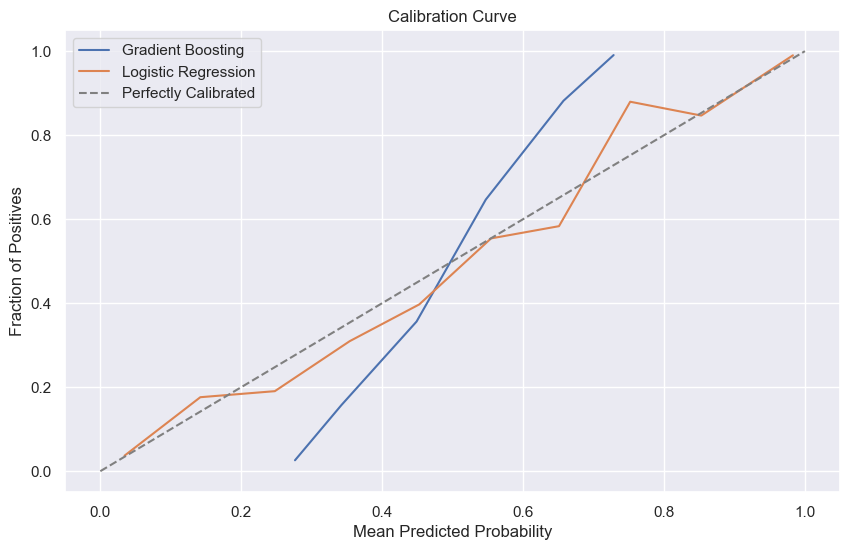

In [14]:
from sklearn.calibration import calibration_curve

fraction_of_positives_gb, mean_predicted_value_gb = calibration_curve(y_test, prob_gb, n_bins=10)
fraction_of_positives_lr, mean_predicted_value_lr = calibration_curve(y_test, prob_lr, n_bins=10)

plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_value_gb, fraction_of_positives_gb, label='Gradient Boosting')
plt.plot(mean_predicted_value_lr, fraction_of_positives_lr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

Теперь оценим важность признаков для градиентного бустинга.

**Задание:**
1. Поскольку базовая модель — дерево из `sklearn`, вычислите важность каждого признака для каждого дерева, используя атрибут `feature_importances_` у `DecisionTreeRegressor`.
2. Усредните значения важности по всем деревьям и нормализуйте их так, чтобы сумма была равна единице (убедитесь, что значения неотрицательны).
3. Дополните вашу реализацию бустинга, добавив метод `feature_importances_`, который будет возвращать усредненные и нормализованные важности признаков.

**Построение графиков:**
1. Постройте столбчатую диаграмму важности признаков для градиентного бустинга.
2. На соседнем графике изобразите важность признаков для логистической регрессии, используя модули весов.
3. Сравните графики и проанализируйте полученные результаты.

Text(0.5, 0, 'Feature Index')

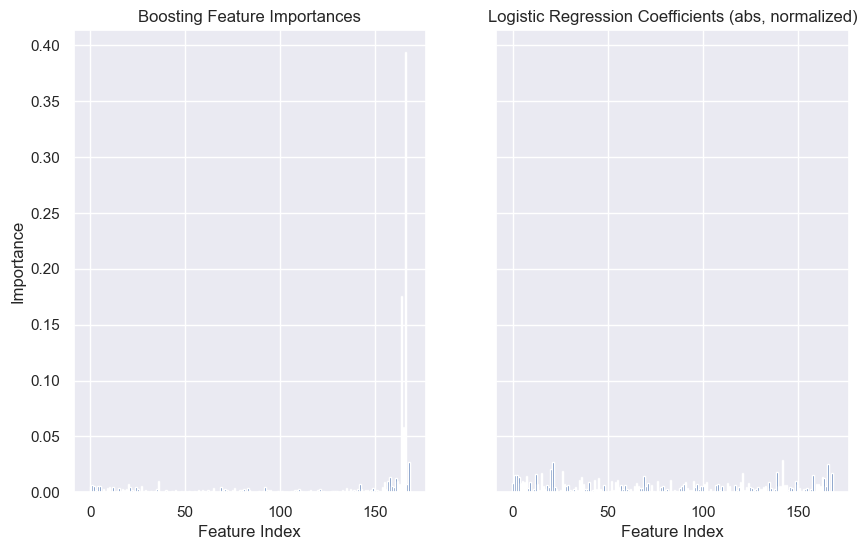

In [19]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

coef_lr = np.abs(logistic_regression.coef_[0])
coef_lr_norm = coef_lr / coef_lr.sum()

feat_imp_boost = best_boosting.feature_importances_
feat_imp_lr = coef_lr_norm

features = np.arange(len(feat_imp_boost))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

axes[0].bar(features, feat_imp_boost)
axes[0].set_title("Boosting Feature Importances")
axes[0].set_xlabel("Feature Index")
axes[0].set_ylabel("Importance")

axes[1].bar(features, feat_imp_lr)
axes[1].set_title("Logistic Regression Coefficients (abs, normalized)")
axes[1].set_xlabel("Feature Index")

Обычно избыточные признаки могут негативно влиять на качество бустинга. Попробуйте следующее:

1. **Отфильтруйте неважные признаки:** Используйте построенную диаграмму важности признаков, чтобы отобрать наиболее незначительные признаки.
2. **Обучите модель повторно:** Обучите модель на основе оставшихся признаков с теми же гиперпараметрами.
3. **Оцените качество модели:** Сравните результаты новой модели с исходной. Улучшилось ли качество после отфильтровывания незначительных признаков?

In [16]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

threshold = np.percentile(feat_imp_boost, 75)

important_features = np.where(feat_imp_boost >= threshold)[0]

print(f"Chosen features (indexes): {important_features}")
print(f"Count of chosen features: {len(important_features)} from {len(feat_imp_boost)}")

selected_features = important_features

x_train_filtered = x_train[:, selected_features]
x_valid_filtered = x_valid[:, selected_features]
x_test_filtered = x_test[:, selected_features]

print(f"Shape of filtered x_train: {x_train_filtered.shape}")
print(f"Shape of filtered x_valid: {x_valid_filtered.shape}")
print(f"Shape of filtered x_test: {x_test_filtered.shape}")

Chosen features (indexes): [  0   1   2   4   5   7   9  10  12  15  20  21  24  25  27  35  36  65
  69  71  76  81  83  92 121 135 142 143 149 154 155 157 158 159 160 161
 162 163 164 165 166 167 168]
Count of chosen features: 43 from 169
Shape of filtered x_train: (18825, 43)
Shape of filtered x_valid: (2354, 43)
Shape of filtered x_test: (2353, 43)


In [17]:
boosting_filtered = Boosting(
    base_model_params={
        "max_depth": best_params['max_depth'],
        "min_samples_leaf": best_params['min_samples_leaf']
    },
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params["learning_rate"],
    subsample=best_params["subsample"],
    early_stopping_rounds=10,
    plot=False
    )

boosting_filtered.fit(x_train_filtered, y_train, x_valid_filtered, y_valid)

y_pred_proba_boost_filtered = boosting_filtered.predict_proba(x_test_filtered)[:, 1]

Iteration 1: Train Loss = 0.6757; Validation Loss = 0.6764
Iteration 2: Train Loss = 0.6596; Validation Loss = 0.6608
Iteration 3: Train Loss = 0.6447; Validation Loss = 0.6462
Iteration 4: Train Loss = 0.6307; Validation Loss = 0.6329
Iteration 5: Train Loss = 0.6179; Validation Loss = 0.6203
Iteration 6: Train Loss = 0.6058; Validation Loss = 0.6086
Iteration 7: Train Loss = 0.5947; Validation Loss = 0.5977
Iteration 8: Train Loss = 0.5844; Validation Loss = 0.5878
Iteration 9: Train Loss = 0.5746; Validation Loss = 0.5783
Iteration 10: Train Loss = 0.5654; Validation Loss = 0.5695
Iteration 11: Train Loss = 0.5569; Validation Loss = 0.5615
Iteration 12: Train Loss = 0.5489; Validation Loss = 0.5540
Iteration 13: Train Loss = 0.5415; Validation Loss = 0.5469
Iteration 14: Train Loss = 0.5346; Validation Loss = 0.5404
Iteration 15: Train Loss = 0.5278; Validation Loss = 0.5342
Iteration 16: Train Loss = 0.5218; Validation Loss = 0.5283
Iteration 17: Train Loss = 0.5159; Validation Los

In [20]:
from sklearn.metrics import roc_auc_score

roc_auc_default = best_boosting.score(x_test, y_test)

roc_auc_filtered = roc_auc_score(y_test, y_pred_proba_boost_filtered)

print(f"Original Boosting Test ROC-AUC: {roc_auc_default:.4f}")
print(f"Reduced Boosting Test ROC-AUC: {roc_auc_filtered:.4f}")

Original Boosting Test ROC-AUC: 0.9640
Reduced Boosting Test ROC-AUC: 0.9636


## Задание 5 (бонус). Блендинговое [0.5 балла]

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 6 (бонус). Катбустовое [0.5 балла]

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Оставьте пожалуйста отзыв о курсе!

https://forms.gle/LajA3Xrps6u96Q5A8


Это очень важно. Благодаря обратной связи мы будем двигаться в сторону антиградиента)
